In [1]:
import numpy as np
import pandas as pd

In [2]:
anime = pd.read_csv('../input/anime-recommendations-database/anime.csv')
ratings = pd.read_csv('../input/anime-recommendations-database/rating.csv')

In [3]:
data = pd.merge(ratings, anime, on='anime_id')
data = data.dropna()
data = data.drop('rating_y', axis=1)
data.rename(columns = {'rating_x':'rating'}, inplace = True)
data = data[data['rating'] != -1]
data

,user_id,anime_id,rating,name,genre,type,episodes,members
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
5,21,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
6,28,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
7,34,20,9,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
...,...,...,...,...,...,...,...,...
7813720,65175,30095,7,Qi Cai Lao Fu Zi,"Action, Comedy, Seinen",Movie,1,82
7813721,65175,30096,7,Lao Fu Zi Shui Hu Chuan,"Comedy, Historical, Seinen",Movie,1,65
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,45


# Анализ жанров

Чтобы определить, что смотрят нынче анимешники, сначала вытащим все жанры аниме

In [4]:
dirty_genre_list = list(set(data.genre))
genre_list = list(set([g for x in dirty_genre_list for g in x.split(', ')]))
pd.Series(genre_list)

0             Mecha
1      Martial Arts
2          Thriller
3           Fantasy
4        Historical
5         Adventure
6            Horror
7            Comedy
8           Mystery
9           Romance
10      Super Power
11    Psychological
12          Vampire
13           Seinen
14           Sci-Fi
15            Music
16           Hentai
17    Slice of Life
18            Magic
19            Space
20            Josei
21           Action
22           Demons
23             Yaoi
24            Drama
25       Shounen Ai
26             Yuri
27             Game
28           Sports
29             Kids
30        Shoujo Ai
31         Dementia
32         Military
33          Samurai
34     Supernatural
35           Police
36           Shoujo
37            Harem
38            Ecchi
39           School
40             Cars
41           Parody
42          Shounen
dtype: object

Теперь проанализируем, сколько фильмов в каждом жанре

In [5]:
stats_df = pd.DataFrame(columns=['Жанр', 'Число фильмов'])
stats_df['Жанр'] = genre_list
stats_df['Число фильмов'] = 0

for g in list(set(data.genre)):
    for genre in g.split(', '):
        stats_df.loc[stats_df['Жанр'] == genre, 'Число фильмов'] += 1
    
stats_df = stats_df.sort_values(by='Число фильмов', ascending=False)

In [6]:
stats_df

,Жанр,Число фильмов
7,Comedy,1221
21,Action,1134
14,Sci-Fi,803
24,Drama,795
5,Adventure,779
3,Fantasy,761
9,Romance,744
42,Shounen,636
34,Supernatural,567
39,School,453


<AxesSubplot:xlabel='Жанр'>

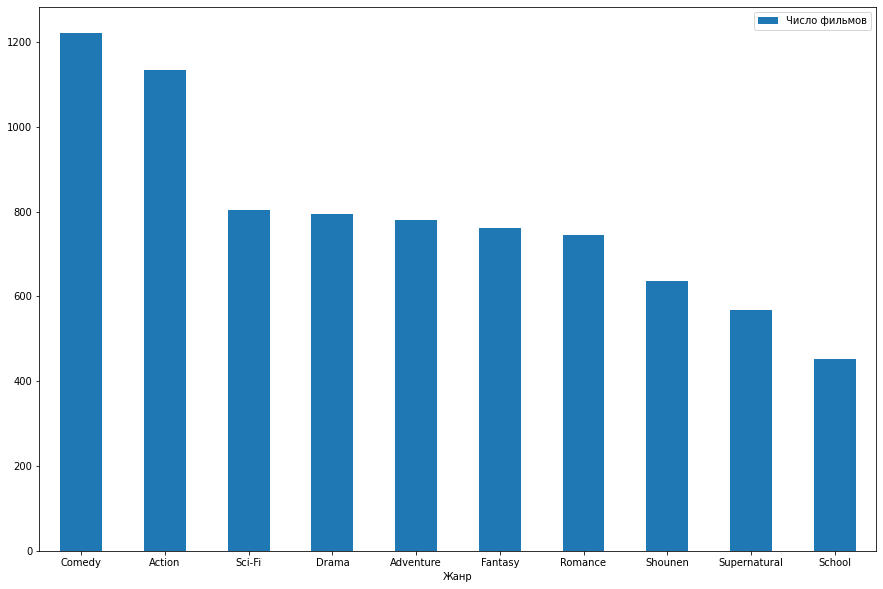

In [7]:
stats_df.set_index('Жанр').head(10).plot(kind='bar', figsize=(15, 10), rot=0)

# Выведение средней оценки аниме

Датасет предоставляет данные о отзывах людей о разных аниме, можно воспользоваться этим и найти среднее значение для каждого тайтла

In [8]:
mean_df = pd.DataFrame(columns=['Фильм', 'Средняя оценка'])
mean_df['Фильм'] = list(set(data['name']))
mean_df['Средняя оценка'] = list(data.groupby('name')['rating'].mean().round(2))
mean_df = mean_df.sort_values(by='Средняя оценка', ascending=False)
mean_df

,Фильм,Средняя оценка
4330,Mirai Shounen Conan,10.0
6492,Orange,10.0
3223,Detective Conan OVA 06: Follow the Vanished Di...,10.0
3213,Saki Picture Drama,10.0
1275,Nijiiro Days: Houkago Special,10.0
...,...,...
4240,Pretty Rhythm: Dear My Future,1.0
9517,Atama wa Tsukaiyou. Card mo Tsukaiyou.,1.0
4263,Try Z,1.0
8584,Chocolate Underground: Bokura no Chocolate Sensou,1.0
